In [1]:
import sys
import osmnx as ox
import matplotlib.pyplot as plt
sys.path.append('../')

# Clustering for Test Run

In [2]:
from src.vars import test_cities
cities, countries = zip(*test_cities)
print(cities)

('The Hague', 'New York', 'Porto Alegre', 'Delhi', 'Moscow', 'Beijing', 'Rio de Janeiro', 'Lagos', 'Paris', 'Buenos Aires', 'Budapest', 'Nairobi')


Load the data:

In [3]:
from src.utils import load_file
full_gdf = load_file('../data/test-run/tiles_gdf.pickle')
graphs_dict = load_file('../data/test-run/graphs_dict.pickle')

Import the clustering class and create the instance:

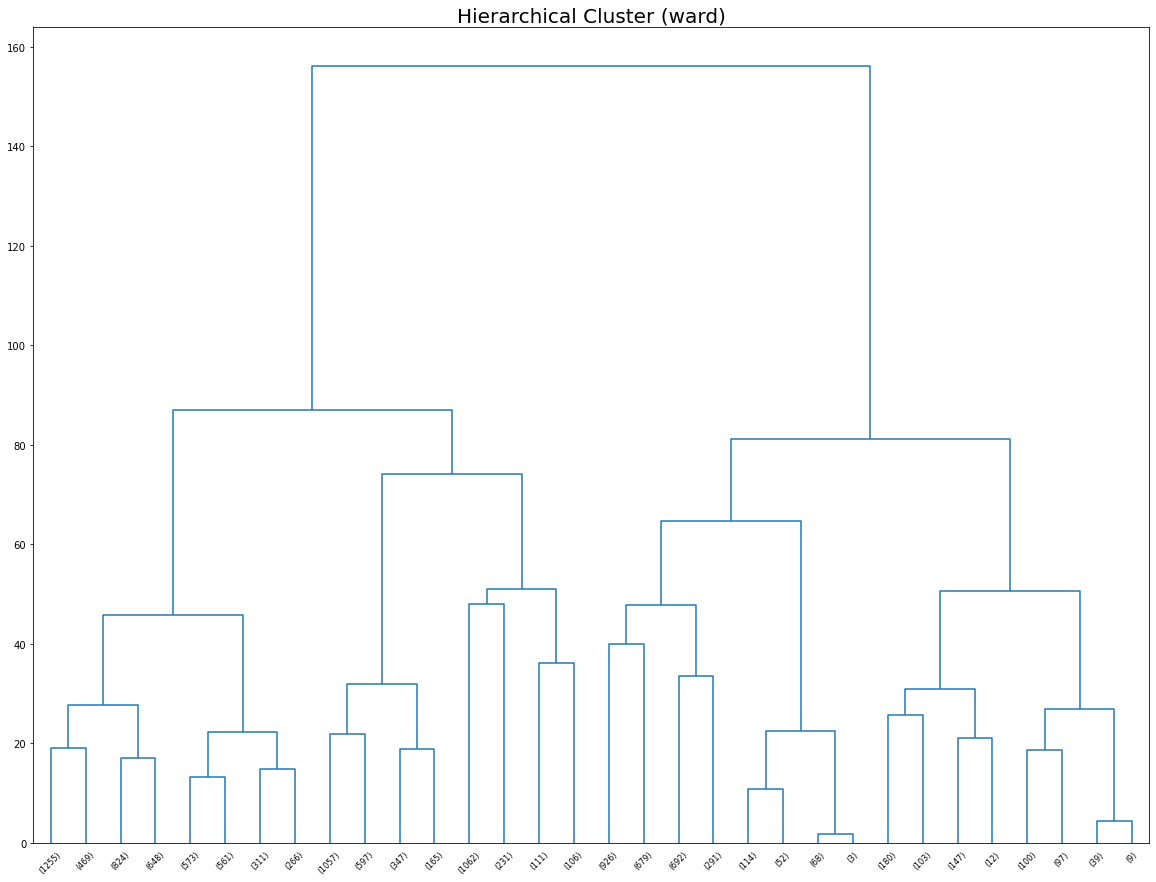

<AxesSubplot:title={'center':'Hierarchical Cluster (ward)'}>

In [4]:
from src.clustering import HierClustering
c = HierClustering(full_gdf, method='ward', metric='euclidean')
c.plot_dendrogram(p=4)

Let's obtain some flat cluster assignment files and save them:

In [5]:
c3 = c.get_flat_clusters(3, test=True)
cluster3_gdf = c.add_cluster_column(c3)
c4 = c.get_flat_clusters(4, test=True)
cluster4_gdf = c.add_cluster_column(c4)
c5 = c.get_flat_clusters(5, test=True)
cluster5_gdf = c.add_cluster_column(c5)
c6 = c.get_flat_clusters(6, test=True)
cluster6_gdf = c.add_cluster_column(c6)

## cities visualization

Text(0.5, 0.98, '5 clusters')

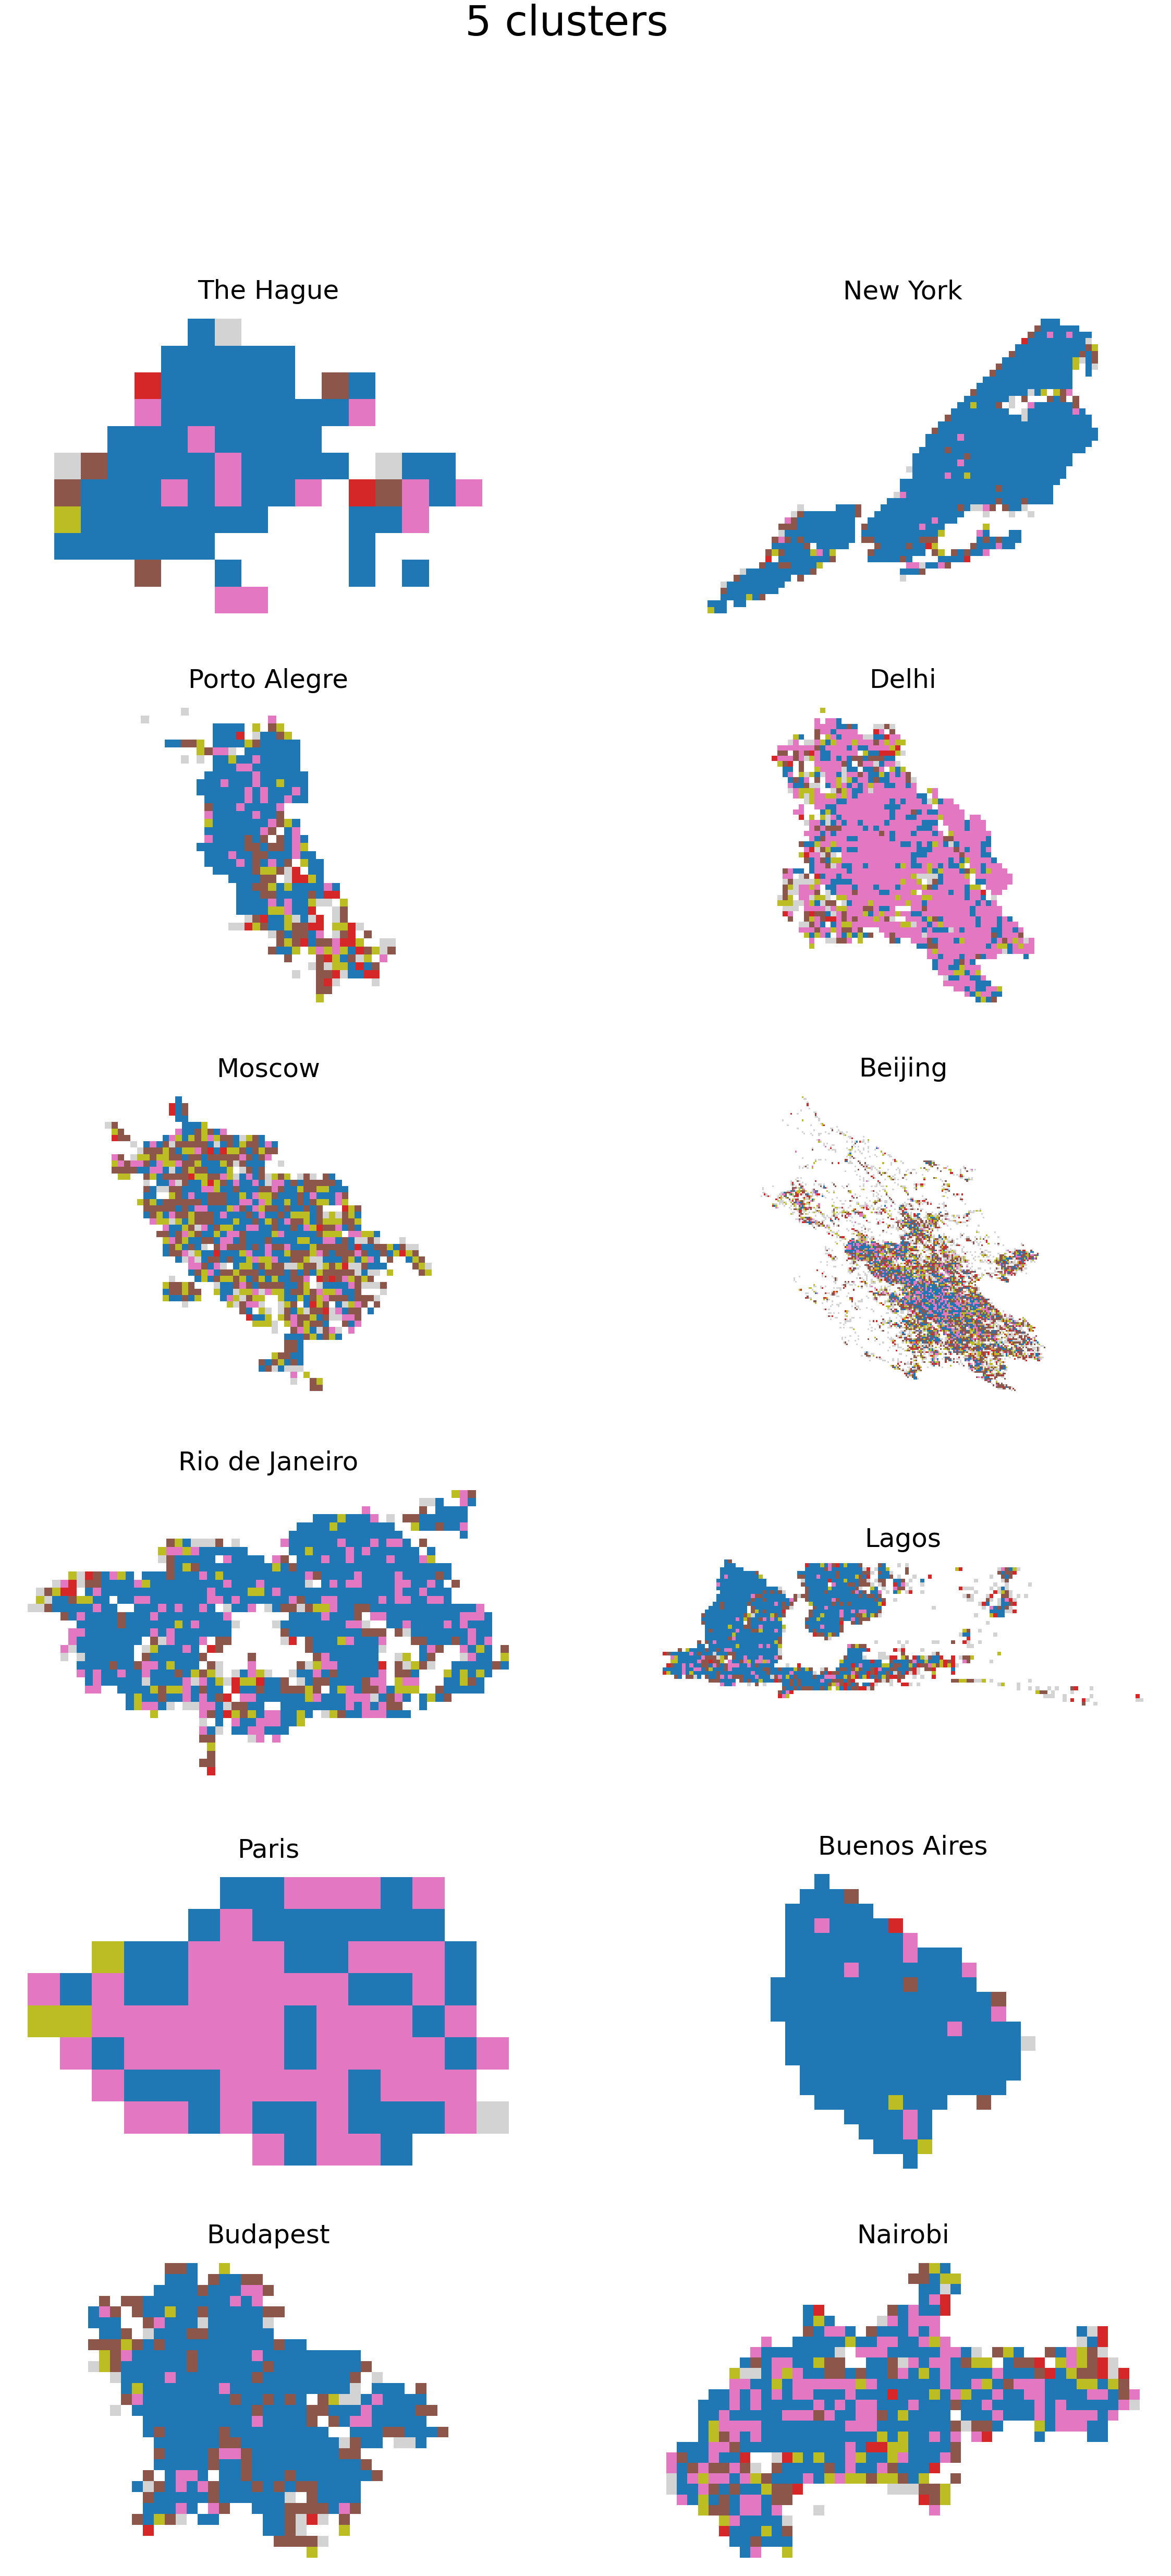

In [6]:
fig, Axes = plt.subplots(figsize=(40,80), nrows=6, ncols=2)

for city, ax in zip(cities, Axes.flatten()):
    ax = c.plot_city(city, n_clusters=5, ax=ax)

fig.suptitle('5 clusters', fontsize=80)

## clusters for different cities

In [1]:
def f(rs):

    fig, Axes = plt.subplots(figsize=(80,100), nrows=5, ncols=4)

    j = 0

    for city, country in zip(['Paris', 'Rio de Janeiro', 'New York', 'Budapest'], ['France', 'Brazil', 'USA', 'Hungary']):
        i=0
        #print(city)

        city_gdf = cluster5_gdf[cluster5_gdf['city'] == city].reset_index()
        graph = graphs_dict[(city, country)]
        nodes = ox.graph_to_gdfs(graph, edges=True)
        print(nodes)
        
        dferfe
        for cluster in [1, 2, 3, 4, 5]:

            #print(cluster)

            ax = Axes[i, j]

            city_gdf_cluster = city_gdf[city_gdf['cluster'] == cluster].reset_index()
            city_gdf_cluster = city_gdf_cluster.drop(columns=['level_0'])
            #print(city_gdf_cluster)

            if len(city_gdf_cluster.index) != 0:

                tile = city_gdf_cluster.sample(n=1, random_state=rs).reset_index()
                bdry = tile.geometry[0]
                #print(bdry)

                intersecting_nodes = nodes[nodes.intersects(bdry)].index
                graph_sub = graph.subgraph(intersecting_nodes)

                try:
                    ox.plot.plot_graph(graph_sub, ax=ax, node_size=0, node_zorder=1, show=False, edge_linewidth=3)
                except:
                    pass

            if i == 0:
                ax.set_title(city, fontsize=50)
            i += 1

        j += 1

    plt.show()
    
    return ax

In [2]:
f(0)

NameError: name 'plt' is not defined

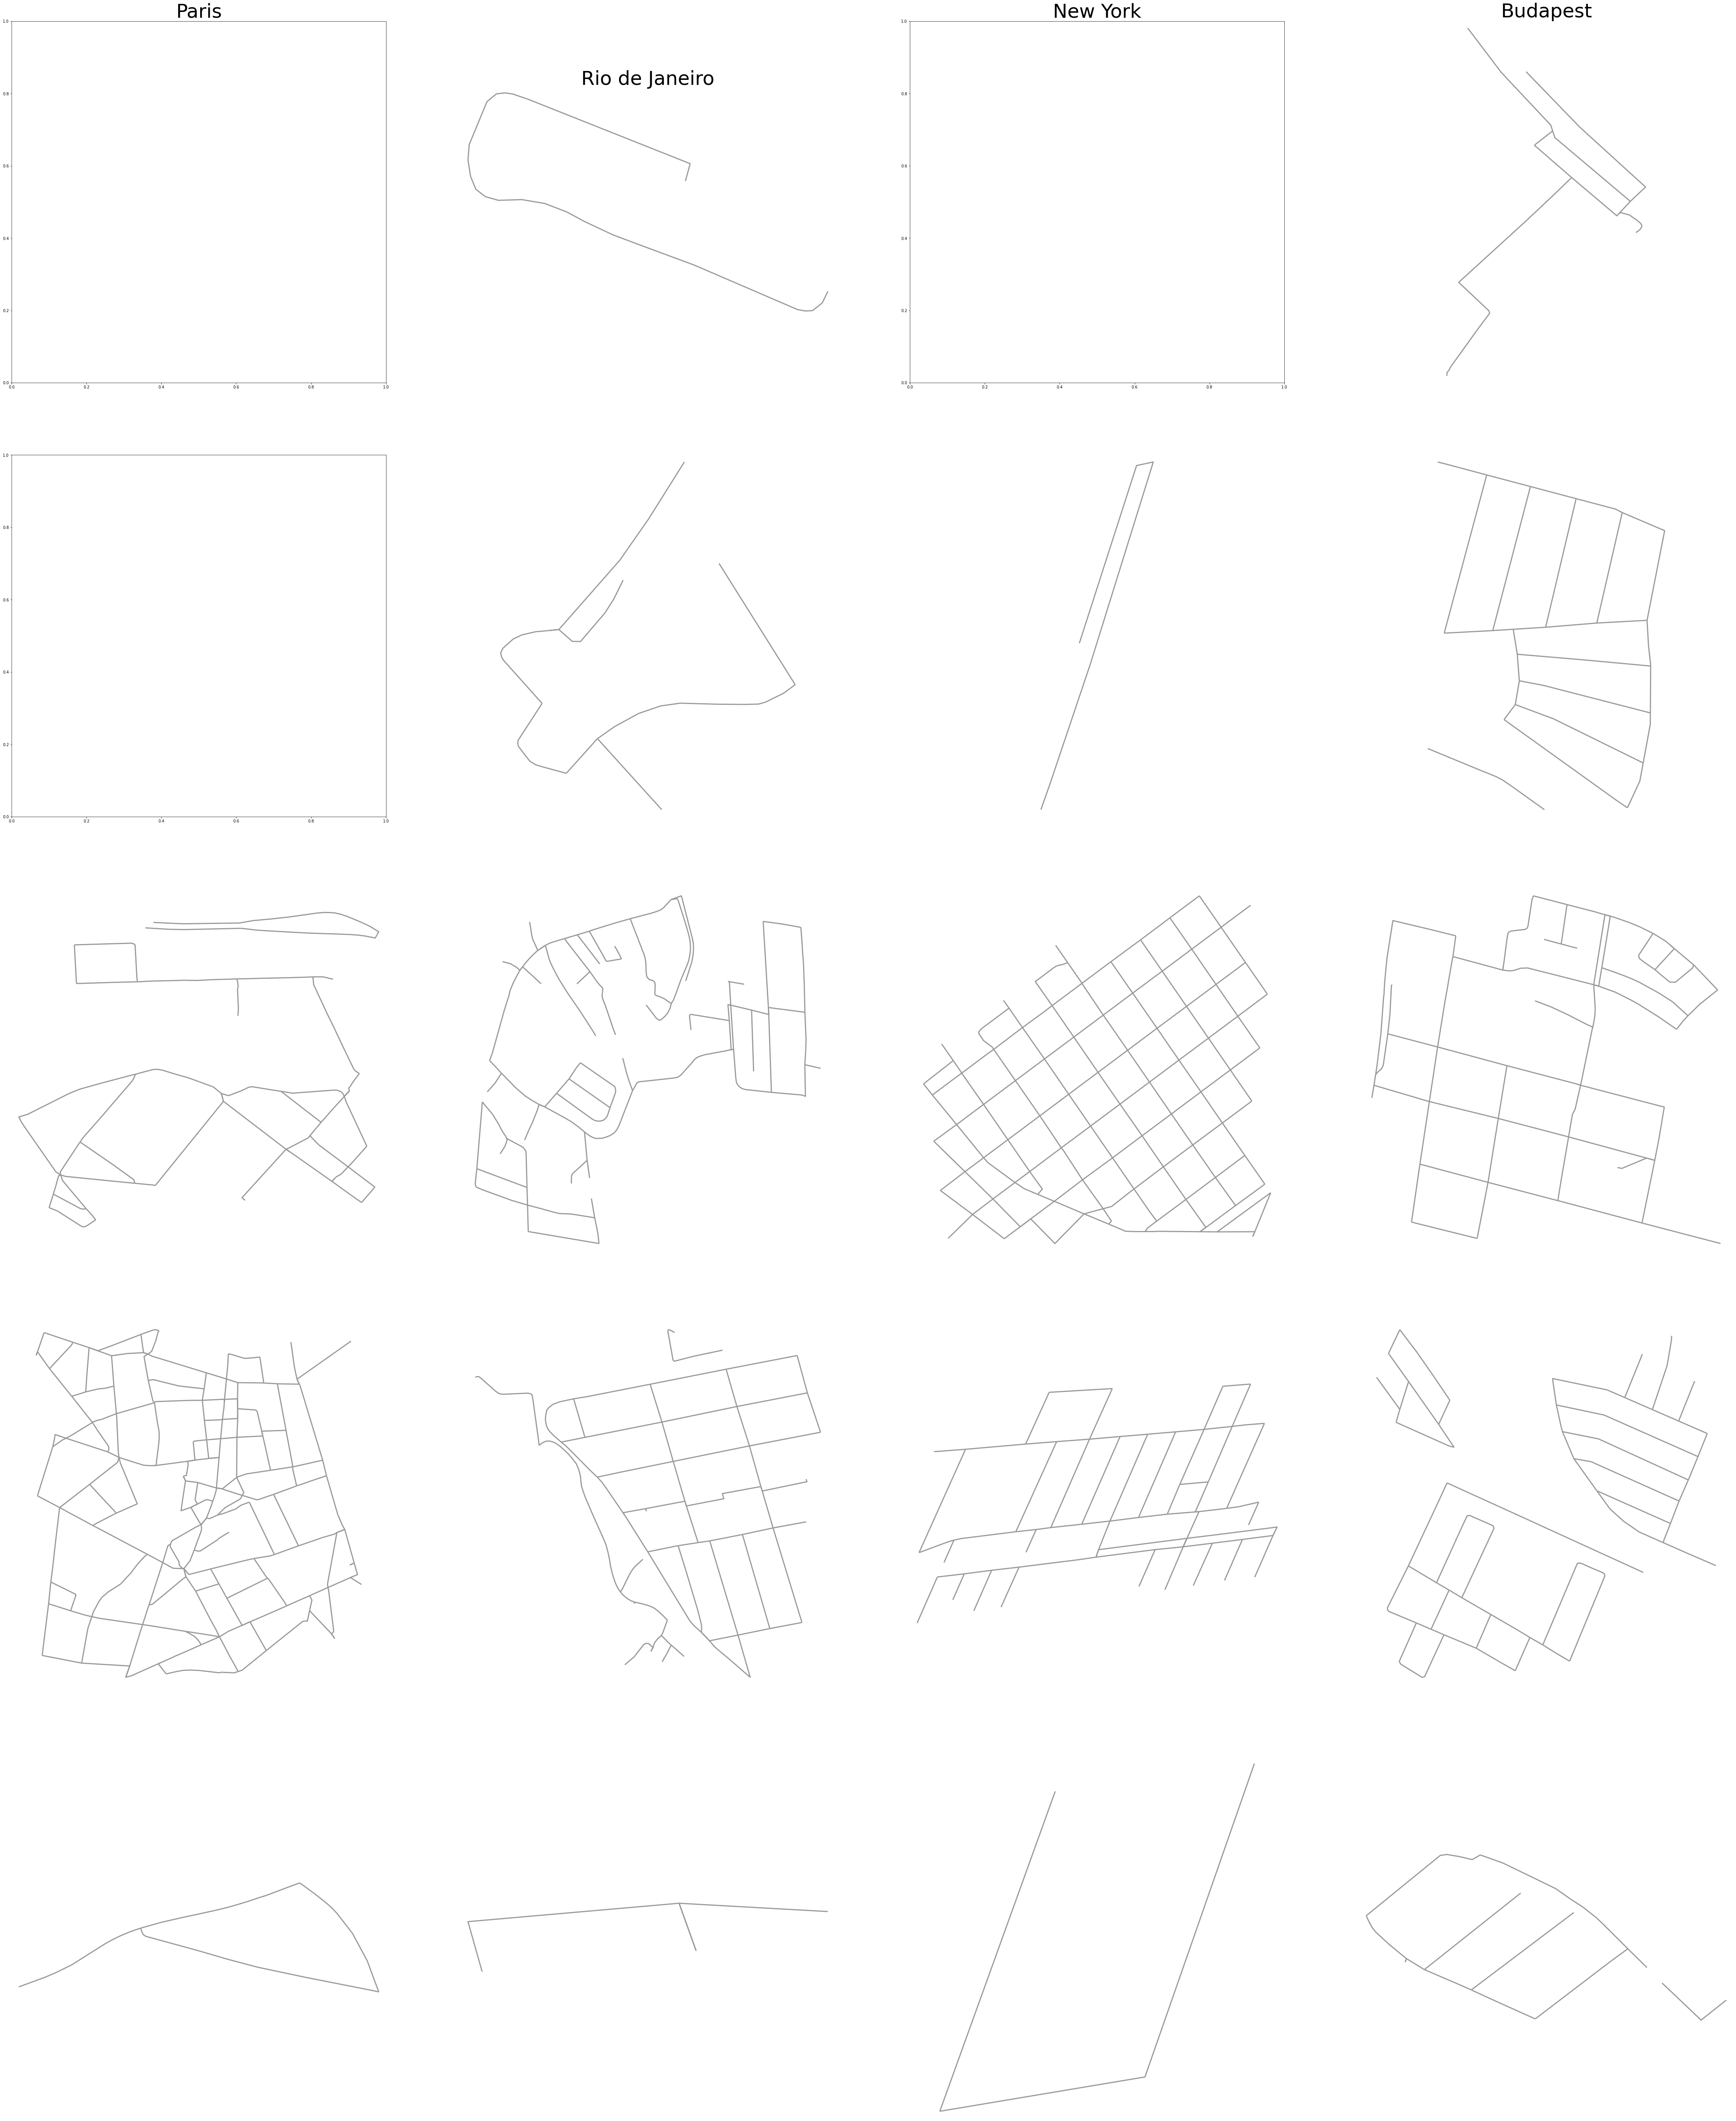

<AxesSubplot:>

In [13]:
f(1)

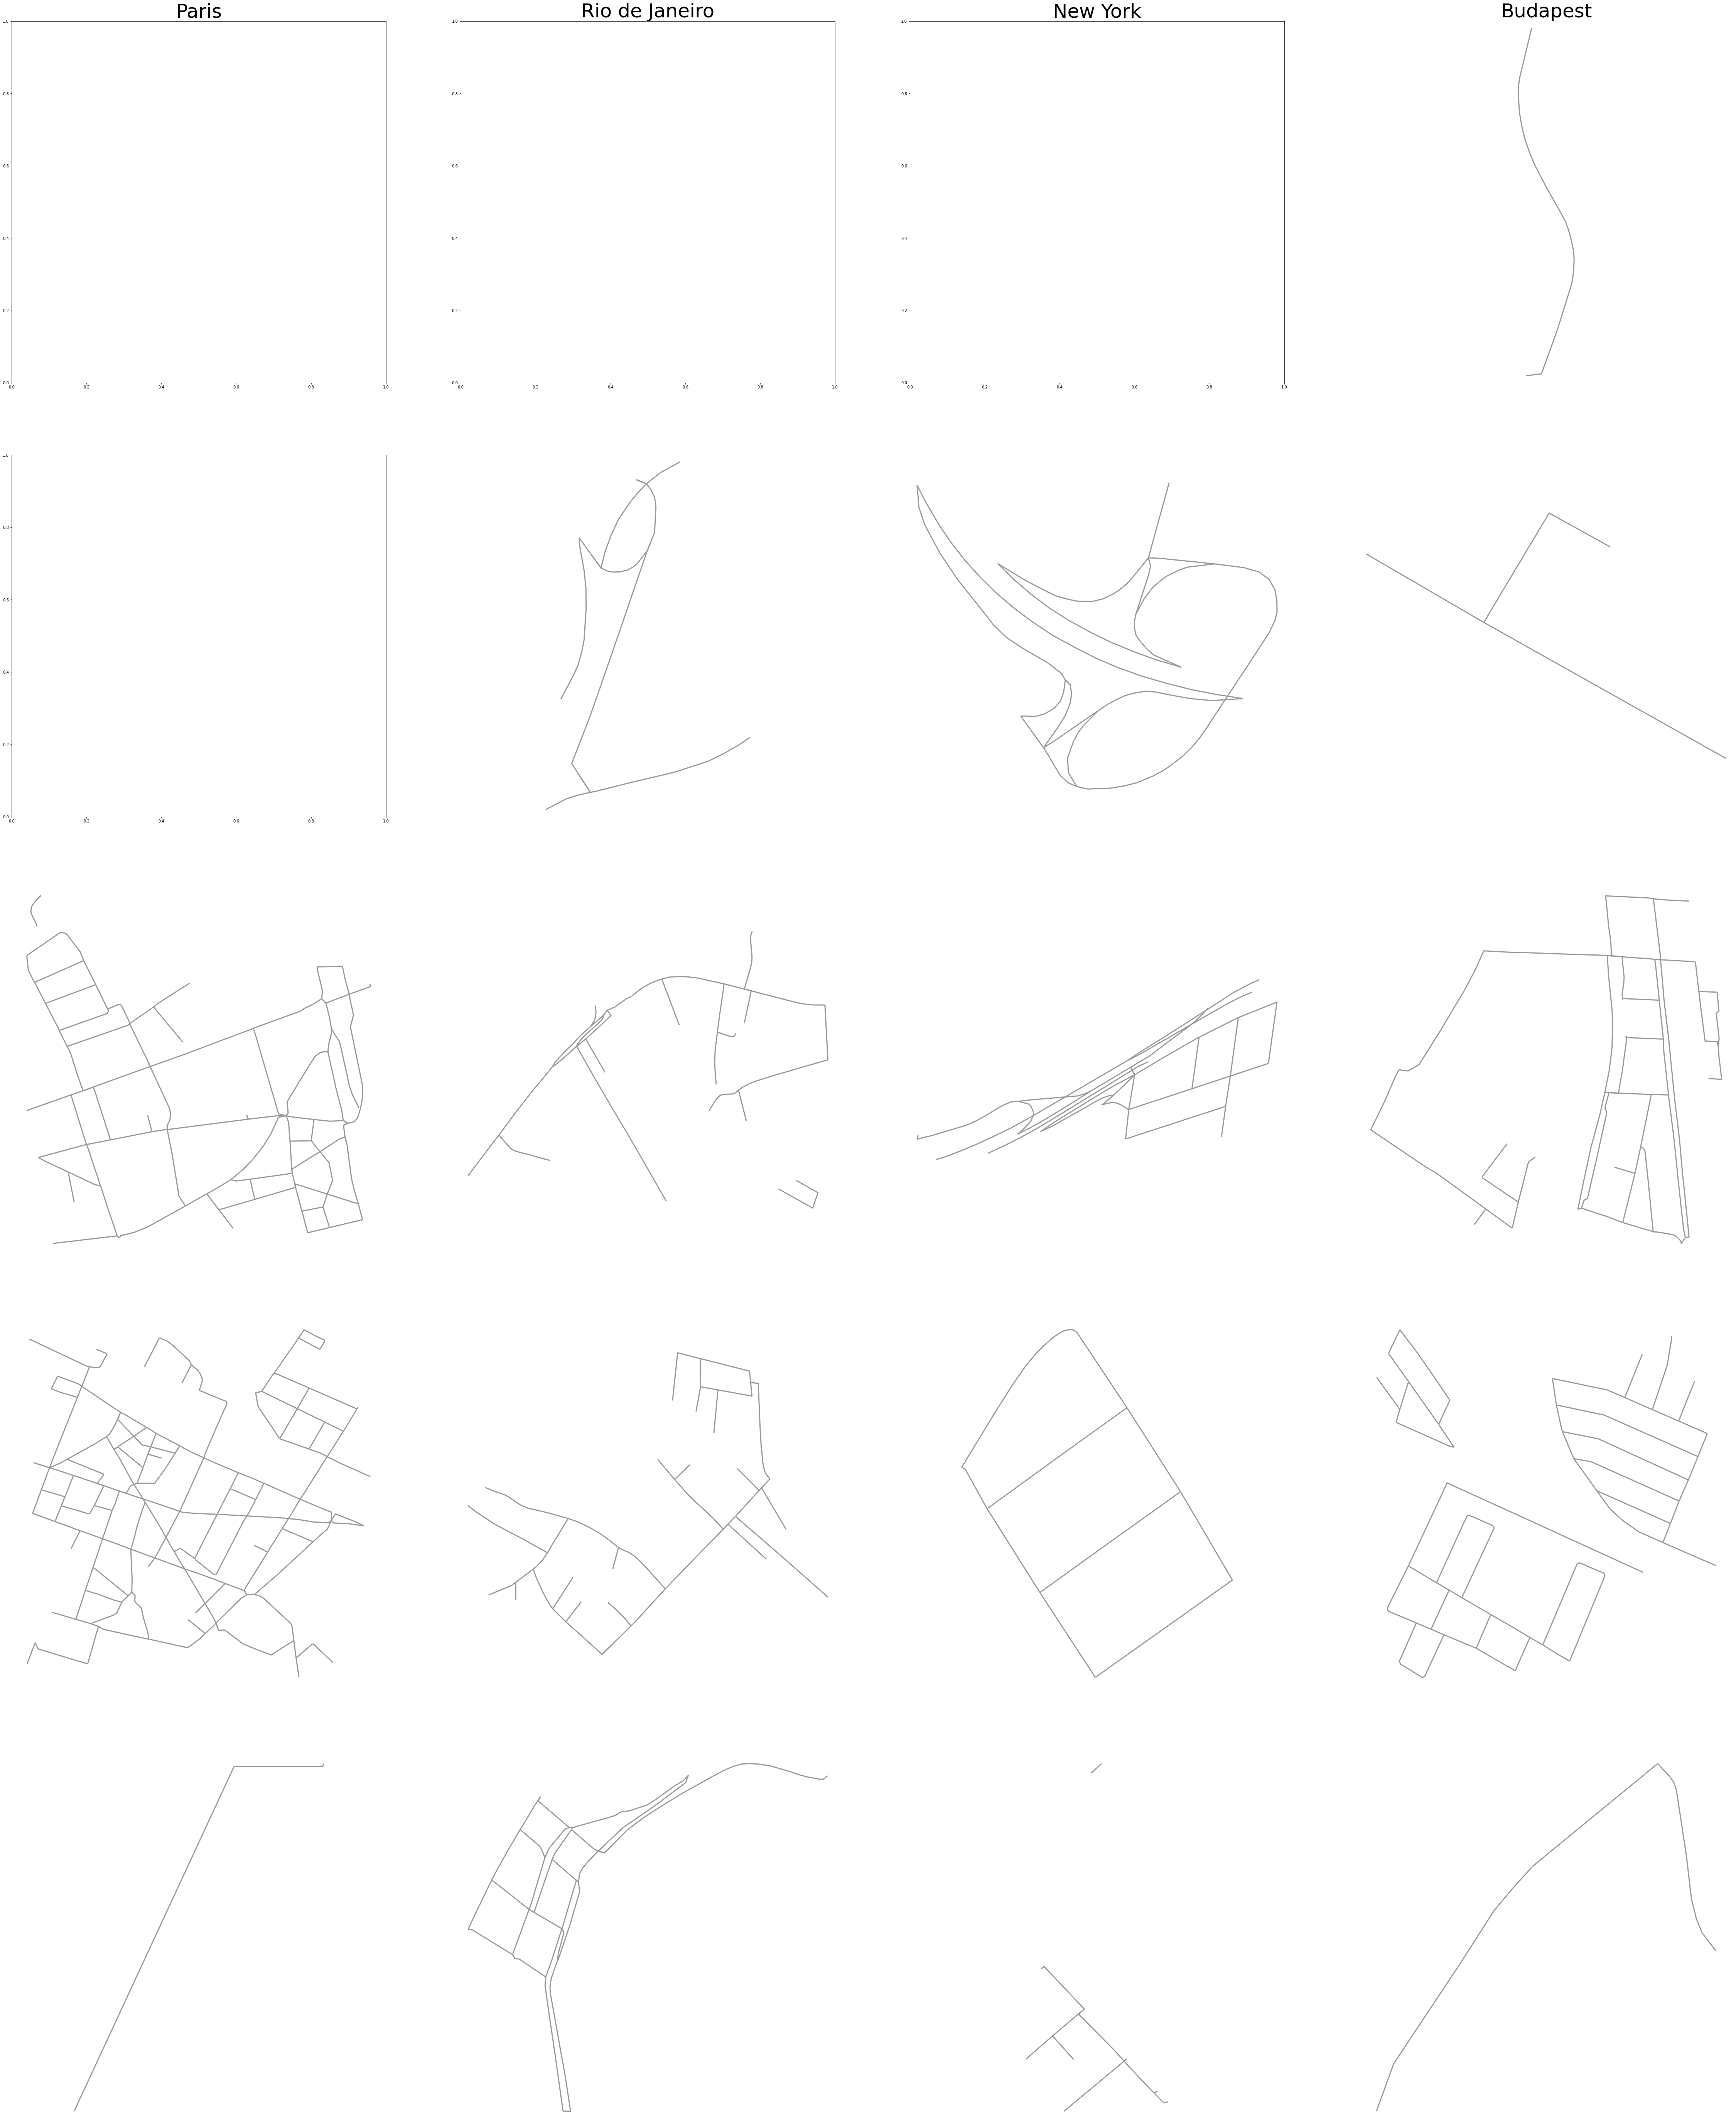

<AxesSubplot:>

In [14]:
f(2)

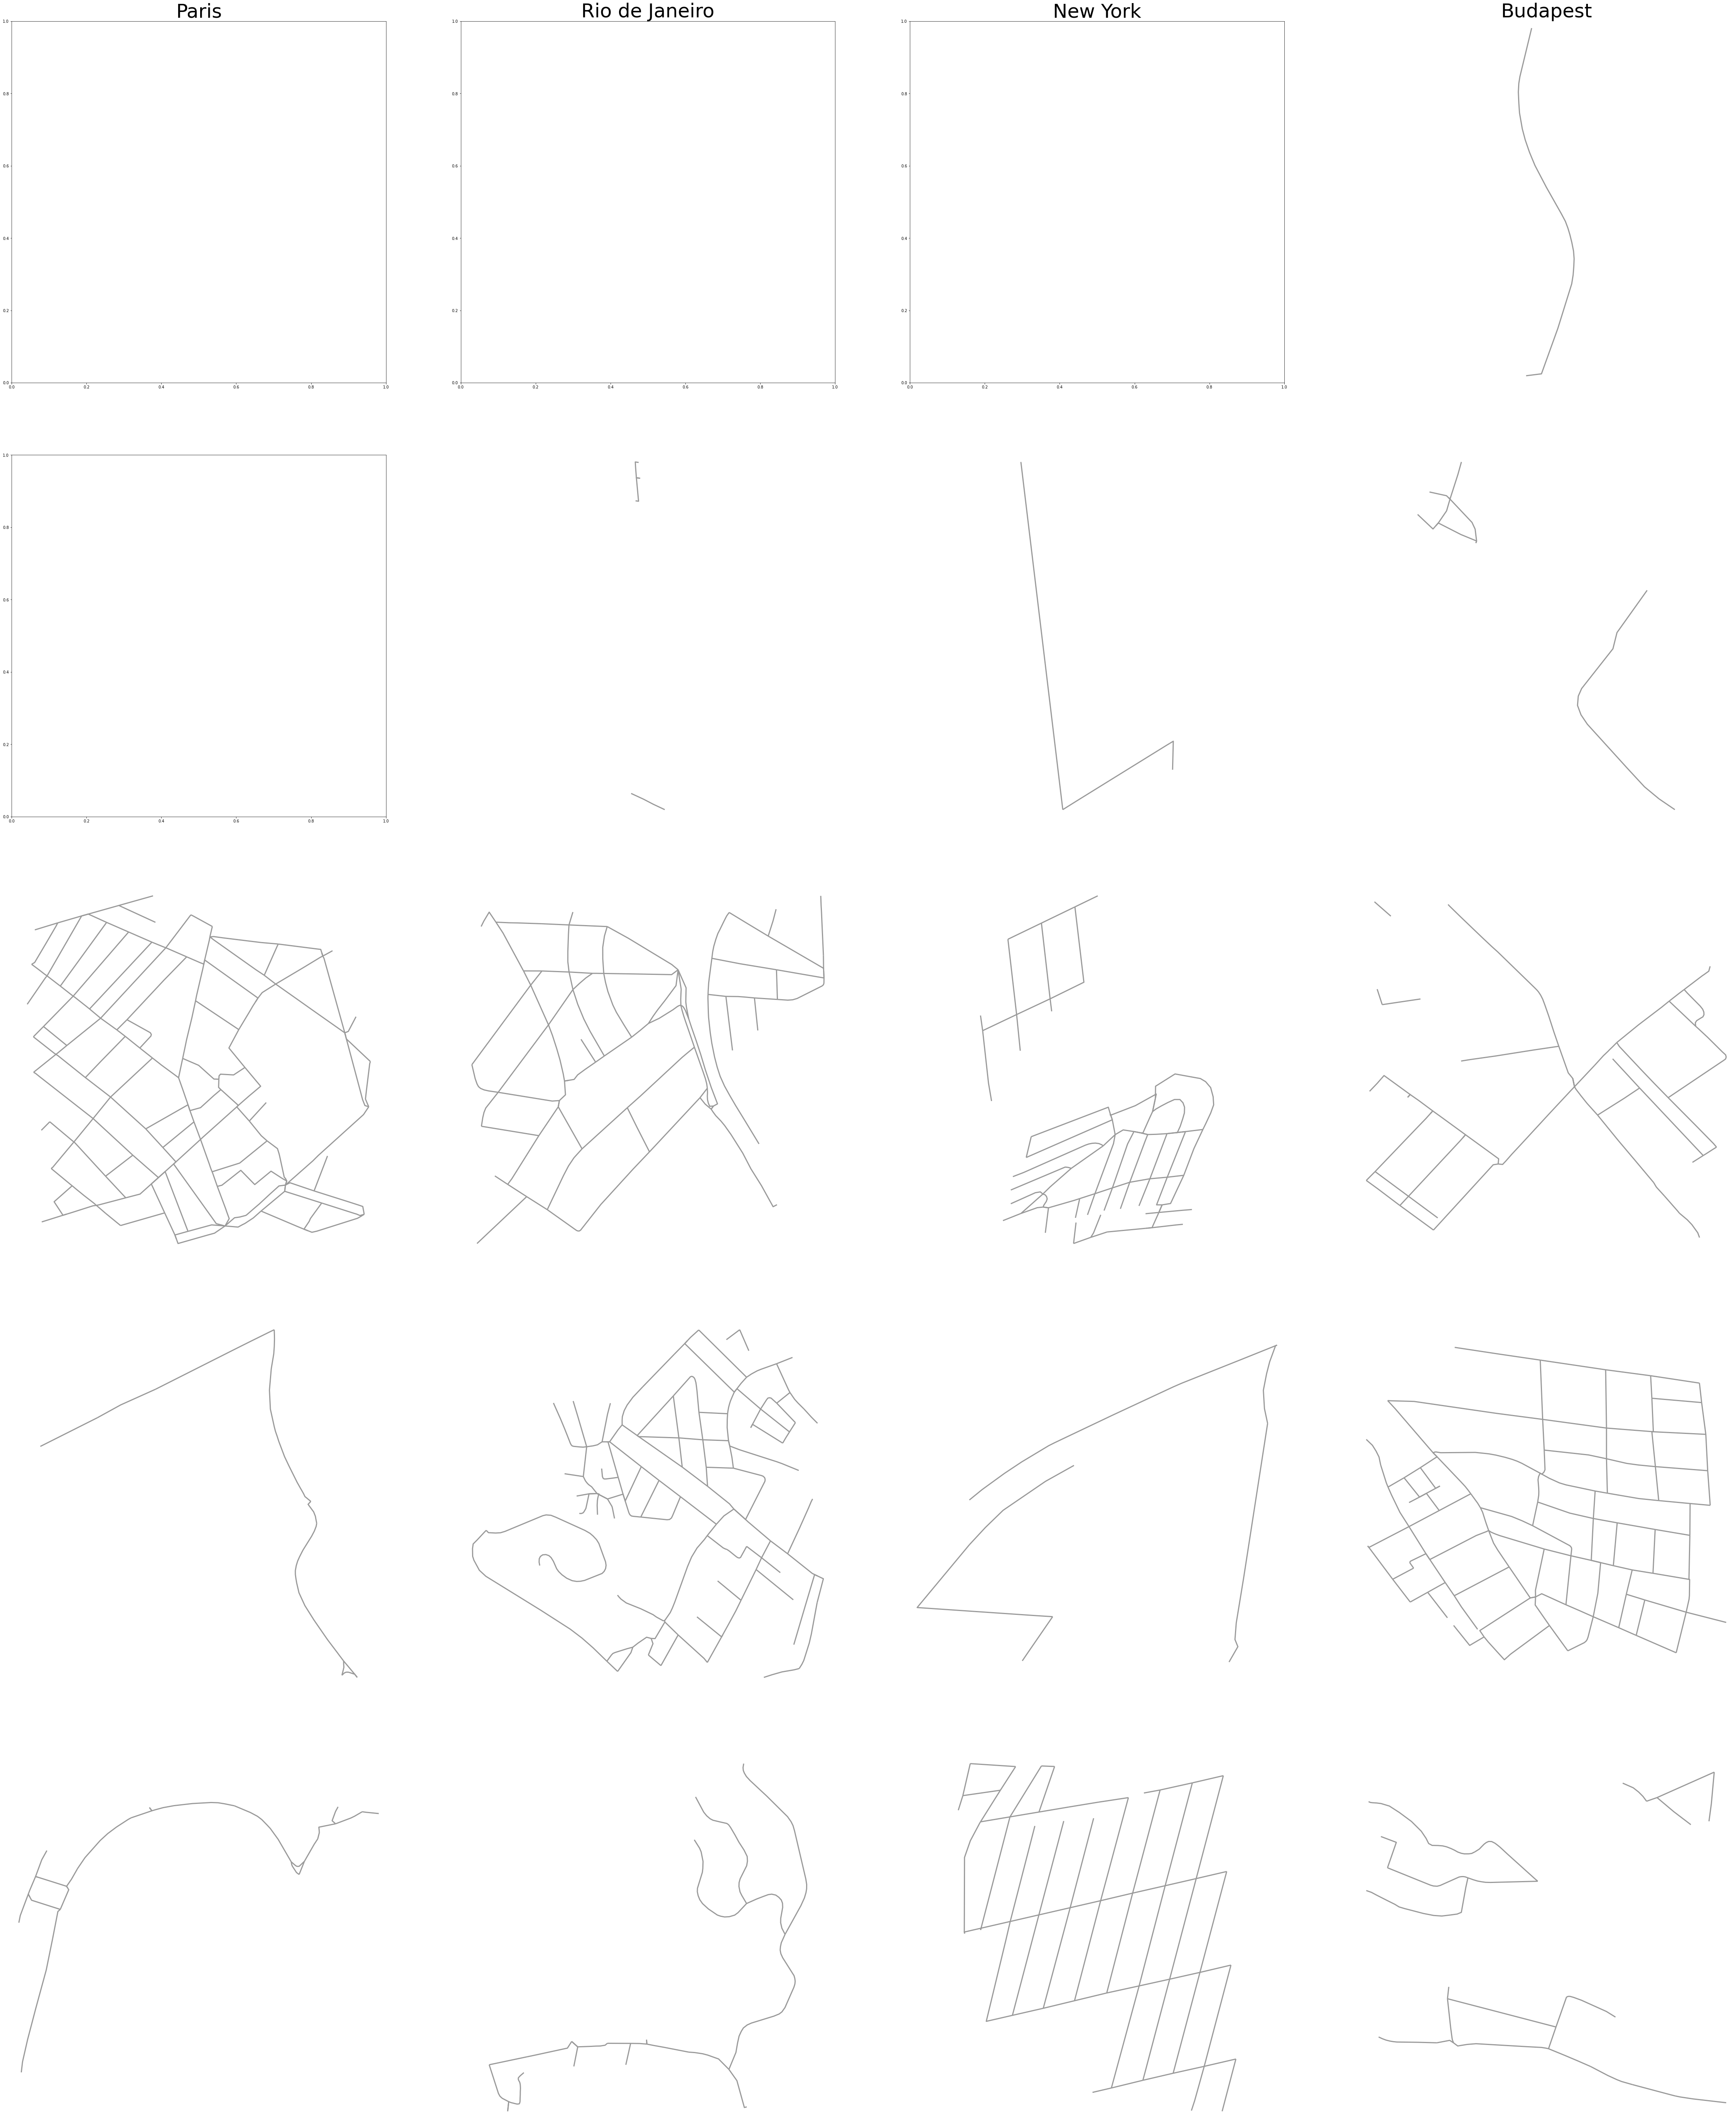

<AxesSubplot:>

In [15]:
f(3)